# **Private Companies Prediction**

![](https://www.hvj.co.in/images/services/service-single/pvtltd.jpg)

**IMPORTING THE LIBRARIES**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline


**LOADING THE DATASET**

In [47]:
data=pd.read_csv("Pvivate Limited Companies Database.xlsx - Sheet1.csv")

In [48]:
data.head()

,Company,city,pincode,locality,Sub_Locality,Address,Building_Name,Landmarks,StdCode,telephone1,...,mobile,mobile2,ptc_name,Email,Email1,CompanyEmail,Website,level1,level2,level3
0,Aravali Plasto Packers Pvt Ltd,Abu Road,307026.0,Ambaji Industrial Area,NaN,G-1/185,NaN,NaN,2974,226292,...,9414153904,,R L Agarwal,NaN,NaN,NaN,NaN,Packaging & Printing,Bags & Bags Machinery,Bags- Plastic
1,Malviya Crafts Pvt Ltd,Abu Road,307026.0,Arbuta Industrial Area,Gandhi Nagar,G -106,NaN,NaN,2974,221305,...,9414152350,,Ashok Malviya,malviya_craft@yahoo.com,NaN,NaN,NaN,"Arts, Events & Occasions",Art & Craft,Handicrafts
2,S K Marble Pvt Ltd,Abu Road,307026.0,RIICO Growth Centre,NaN,E-274-275,NaN,NaN,2974,226317,...,9414152602,,Vijay K Singh,NaN,NaN,NaN,NaN,"Building, Construction & Real Estate",Building Stones & Services,Marble
3,Nutan Rajumani Transport Pvt Ltd,Abu Road,307026.0,Ambaji Industrial Area,NaN,NaN,NaN,NaN,2974,226576,...,9829484474,,Kamlesh Jain,NaN,NaN,NaN,NaN,"Transport, Logistics & Relocation",Transportation Services,Transporters
4,Mitsuboshi Belting India Pvt Ltd,Abu Road,307026.0,Ambaji Industrial Area,Sadar Market,NaN,NaN,NaN,2974,NaN,...,9929366611,,Kamlesh Meena,NaN,NaN,NaN,NaN,Textile & Leather,Fabric,Fabric- Multi Range


In [49]:
data.describe()

,pincode,StdCode
count,53635.000000,53636.000000
mean,360124.026848,125.973544
std,168138.013064,332.448733
min,110001.000000,11.000000
25%,201005.000000,20.000000
50%,400051.000000,80.000000
75%,560009.000000,120.000000
max,570078.000000,8156.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53636 entries, 0 to 53635
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        53636 non-null  object 
 1   city           53636 non-null  object 
 2   pincode        53635 non-null  float64
 3   locality       53561 non-null  object 
 4   Sub_Locality   35915 non-null  object 
 5   Address        48246 non-null  object 
 6   Building_Name  20577 non-null  object 
 7   Landmarks      18219 non-null  object 
 8   StdCode        53636 non-null  int64  
 9   telephone1     38610 non-null  object 
 10  telephone2     19189 non-null  object 
 11  telephone3     11312 non-null  object 
 12  mobile         51148 non-null  object 
 13  mobile2        18090 non-null  object 
 14  ptc_name       40164 non-null  object 
 15  Email          12953 non-null  object 
 16  Email1         1282 non-null   object 
 17  CompanyEmail   13782 non-null  object 
 18  Websit

In [51]:
data.shape   #53636 rows and 22 columns in our dataset

(53636, 22)

In [52]:
data.value_counts

<bound method DataFrame.value_counts of                                       Company       city   pincode  \
0              Aravali Plasto Packers Pvt Ltd   Abu Road  307026.0   
1                      Malviya Crafts Pvt Ltd   Abu Road  307026.0   
2                          S K Marble Pvt Ltd   Abu Road  307026.0   
3            Nutan Rajumani Transport Pvt Ltd   Abu Road  307026.0   
4            Mitsuboshi Belting India Pvt Ltd   Abu Road  307026.0   
...                                       ...        ...       ...   
53631     Klassic Interior Inventions Pvt Ltd  Bangalore  560030.0   
53632                   T M S India   Pvt Ltd  Bangalore  560058.0   
53633                    Travel Tours Pvt Ltd  Bangalore  560052.0   
53634  Keppel Puravankara Development Pvt Ltd  Bangalore  560052.0   
53635            P M C Sierra (India) Pvt Ltd  Bangalore  560100.0   

                     locality  Sub_Locality    Address   Building_Name  \
0      Ambaji Industrial Area           NaN  

In [53]:
data.columns

Index(['Company', 'city', 'pincode', 'locality', 'Sub_Locality', 'Address',
       'Building_Name', 'Landmarks', 'StdCode', 'telephone1', 'telephone2',
       'telephone3', 'mobile', 'mobile2', 'ptc_name', 'Email', 'Email1',
       'CompanyEmail', 'Website', 'level1', 'level2', 'level3'],
      dtype='object')

In [54]:
data.dtypes

Company           object
city              object
pincode          float64
locality          object
Sub_Locality      object
Address           object
Building_Name     object
Landmarks         object
StdCode            int64
telephone1        object
telephone2        object
telephone3        object
mobile            object
mobile2           object
ptc_name          object
Email             object
Email1            object
CompanyEmail      object
Website           object
level1            object
level2            object
level3            object
dtype: object

In [214]:
data.var()

Actual          40.5
Predicted    29040.5
dtype: float64

**Checking Null Values**

In [55]:
data.isnull().sum()


Company              0
city                 0
pincode              1
locality            75
Sub_Locality     17721
Address           5390
Building_Name    33059
Landmarks        35417
StdCode              0
telephone1       15026
telephone2       34447
telephone3       42324
mobile            2488
mobile2          35546
ptc_name         13472
Email            40683
Email1           52354
CompanyEmail     39854
Website          37079
level1               0
level2              12
level3              11
dtype: int64

In [56]:
data.isnull().any()


Company          False
city             False
pincode           True
locality          True
Sub_Locality      True
Address           True
Building_Name     True
Landmarks         True
StdCode          False
telephone1        True
telephone2        True
telephone3        True
mobile            True
mobile2           True
ptc_name          True
Email             True
Email1            True
CompanyEmail      True
Website           True
level1           False
level2            True
level3            True
dtype: bool

**So our dataset contains many null values we have to drop them**

In [62]:
data=data.dropna()

In [63]:
data.isnull().sum()

Company          0
city             0
pincode          0
locality         0
Sub_Locality     0
Address          0
Building_Name    0
Landmarks        0
StdCode          0
telephone1       0
telephone2       0
telephone3       0
mobile           0
mobile2          0
ptc_name         0
Email            0
Email1           0
CompanyEmail     0
Website          0
level1           0
level2           0
level3           0
dtype: int64

**Now our dataset is free of the null values**

***Exploratory Data Analysis***

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**

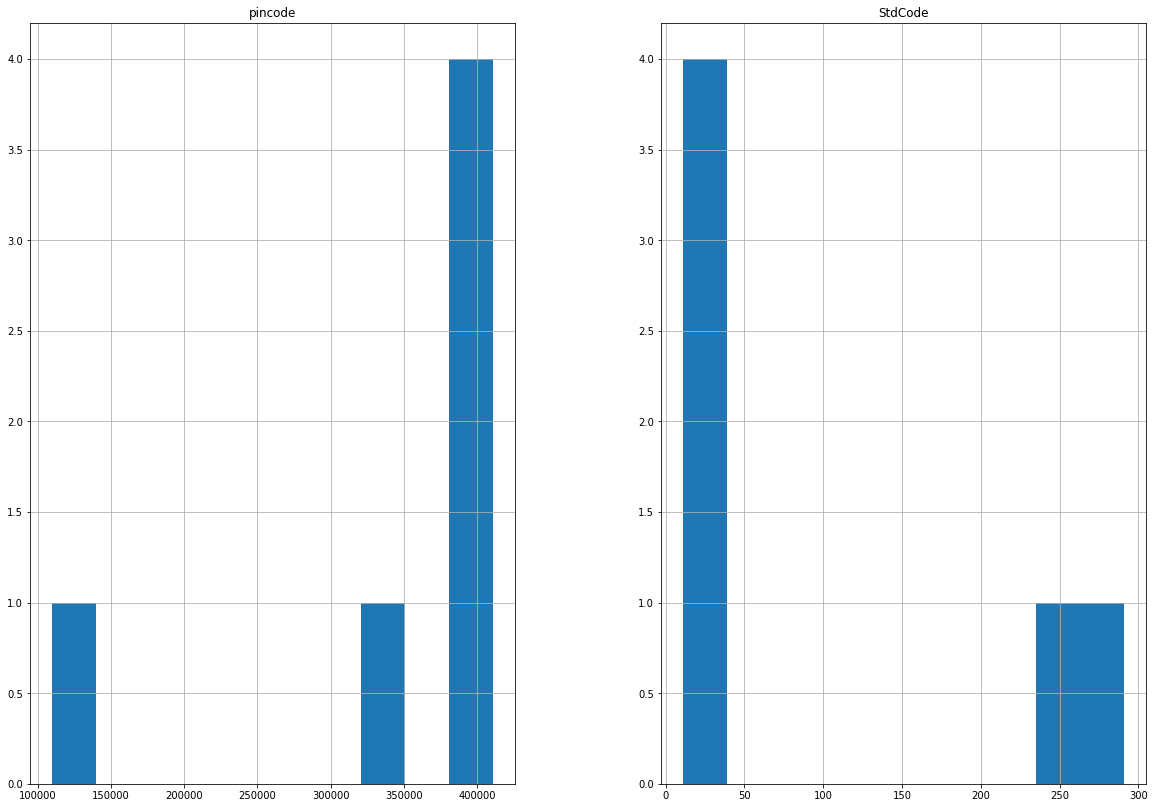

In [64]:
data.hist(figsize=(20,14))
plt.show()


**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



<AxesSubplot:xlabel='StdCode'>

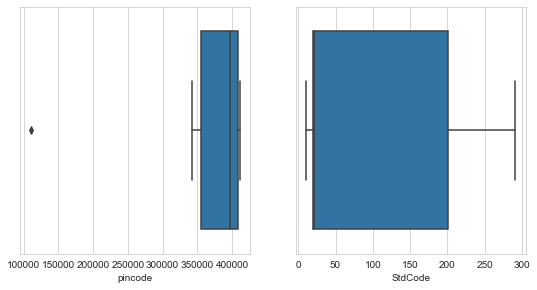

In [92]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='pincode',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='StdCode',data=data)


**JOINTPLOT**

**Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.**



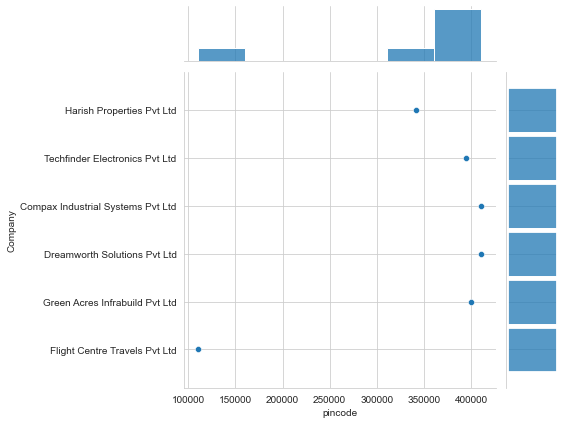

In [105]:
sns.jointplot(x='pincode',y='Company',data=data)

**PAIRPLOT**

**Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. Plot pairwise relationships in a data-set. Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics.**

<Figure size 864x720 with 0 Axes>

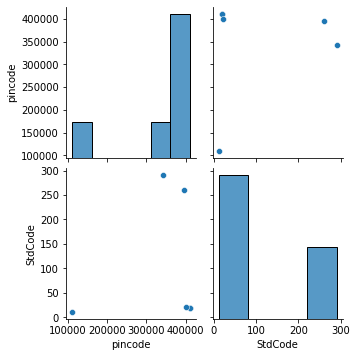

In [83]:
plt.figure(figsize = (12,10))
sns.pairplot(data=data)


In [66]:
data.columns

Index(['Company', 'city', 'pincode', 'locality', 'Sub_Locality', 'Address',
       'Building_Name', 'Landmarks', 'StdCode', 'telephone1', 'telephone2',
       'telephone3', 'mobile', 'mobile2', 'ptc_name', 'Email', 'Email1',
       'CompanyEmail', 'Website', 'level1', 'level2', 'level3'],
      dtype='object')

In [67]:
data.dtypes

Company           object
city              object
pincode          float64
locality          object
Sub_Locality      object
Address           object
Building_Name     object
Landmarks         object
StdCode            int64
telephone1        object
telephone2        object
telephone3        object
mobile            object
mobile2           object
ptc_name          object
Email             object
Email1            object
CompanyEmail      object
Website           object
level1            object
level2            object
level3            object
dtype: object

**BARPLOT**

**A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.**


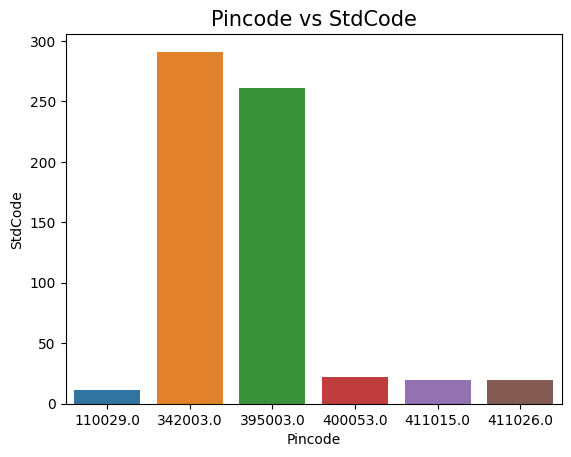

In [113]:
plt.style.use("default")
sns.barplot(x="pincode", y="StdCode",data=data)
plt.title("Pincode vs StdCode",fontsize=15)
plt.xlabel("Pincode")
plt.ylabel("StdCode")
plt.show()



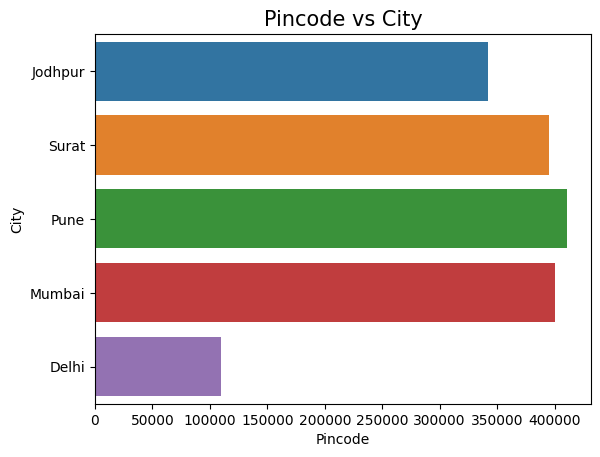

In [116]:
plt.style.use("default")
sns.barplot(x="pincode", y="city",data=data)
plt.title("Pincode vs City",fontsize=15)
plt.xlabel("Pincode")
plt.ylabel("City")
plt.show()

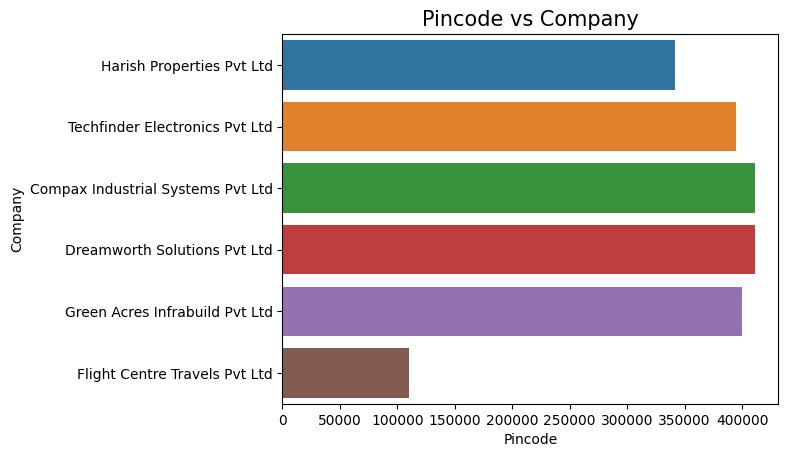

In [129]:
plt.style.use("default")
sns.barplot(x="pincode", y="Company",data=data)
plt.title("Pincode vs Company",fontsize=15)
plt.xlabel("Pincode")
plt.ylabel("Company")
plt.show()

In [132]:
data.corr()

,pincode,StdCode
pincode,1.000000,0.172057
StdCode,0.172057,1.000000


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**

<AxesSubplot:>

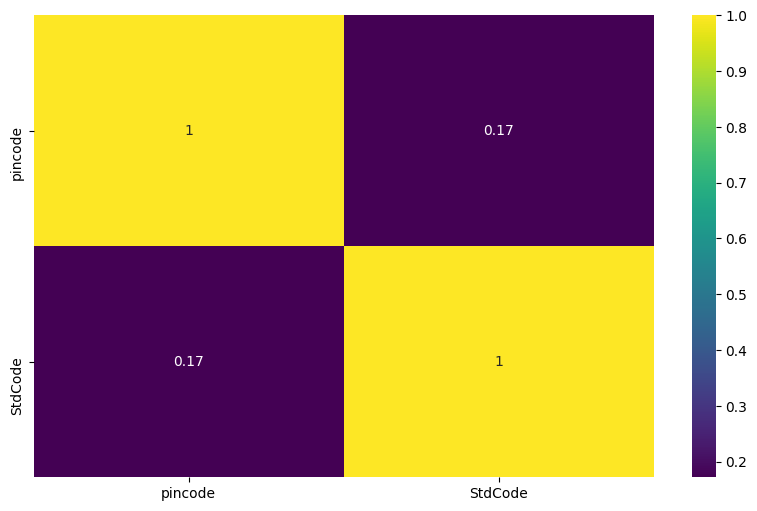

In [131]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

In [133]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [134]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [136]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [137]:
data

,Company,city,pincode,locality,Sub_Locality,Address,Building_Name,Landmarks,StdCode,telephone1,...,mobile,mobile2,ptc_name,Email,Email1,CompanyEmail,Website,level1,level2,level3
7001,4,1,342003.0,3,0,1,0,3,291,0,...,0,1,3,0,0,2,3,1,0,1
11665,5,4,395003.0,4,5,2,4,1,261,2,...,4,2,4,5,2,4,4,2,1,2
14915,0,3,411026.0,1,3,5,3,5,20,1,...,5,0,0,1,0,0,0,2,2,0
14916,1,3,411015.0,5,2,4,5,0,20,4,...,1,0,0,3,0,0,0,0,4,4
20066,3,2,400053.0,0,1,0,2,2,22,3,...,3,3,2,2,3,1,2,1,0,1
28571,2,0,110029.0,2,4,3,1,4,11,5,...,2,0,1,4,1,3,1,3,3,3


In [162]:
y=data['StdCode']
x=data.drop('StdCode',axis=1)


**TRAINING AND TESTING DATA**

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [164]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


4
2
4
2


**MODELS**

**Logistic Regression**

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).**

In [165]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [213]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred_reg=reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print(f"Accuracy Score of Logistic Regression is : {acc_reg*100}")


Classification Report is:
               precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          20       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
 [[0 1]
 [0 1]]
Accuracy Score of Logistic Regression is : 50.0


**DECISION TREE CLASSIFIER**

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**



In [204]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [209]:
y_pred=dtree.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
print("Accuracy Score:\n",reg.score(x_train,y_train)*100)


[[0 1 0]
 [0 0 1]
 [0 0 0]]
              precision    recall  f1-score   support

          11       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
         261       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Accuracy Score:
 25.0


**Random Forest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**



In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [201]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
print("Accuracy Score of the Random Forest Classifier:\n",rfc.score(x_train,y_train)*100)


[[0 1]
 [0 1]]
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          20       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy Score of the Random Forest Classifier:
 100.0


**AdaBoostClassifier**

**An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.**



In [194]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [203]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
print("Accuracy Score of the AdaBoostClassifier:\n",adb.score(x_train,y_train)*100)

[[0 1]
 [0 1]]
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          20       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy Score of the AdaBoostClassifier:
 100.0


In [210]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
28571,11,20
14915,20,261


**CONCLUSION :**
    
**So we get a good accuracy score of 100 % using Random Forest Classifier and Ada Boost Classifier.**

**The accuracy of other models can be increased by Hypertuning.**